# Combine individual datasets from all sources to create a single file

In [179]:
import pandas as pd

df1 = pd.read_csv('../../datasets/dataset1/all-data_senti.csv',usecols=['headline','three_senti'])
df2 = pd.read_csv('../../datasets/FiQA/task1_headline_ABSA_train_senti.csv',usecols=['headline','three_senti'])
df3 = pd.read_csv('../../datasets/FiQA/task1_post_ABSA_train_senti.csv',usecols=['headline','three_senti'])
df4 = pd.read_csv('../../datasets/tiingo_tweets/stockerbot-tweets_1496_clean.csv',usecols=['text','senti'])
df5 = pd.read_csv('../../datasets/tiingo_tweets/stockerbot-tiingo_895_clean.csv',usecols=['title','senti'])
df6 = pd.read_csv('../../datasets/tesla_tweets/tweet_tesla_2020-06-25_to_2020-06-26_label_393_clean.csv',usecols=['tweet','senti'])
df7 = pd.read_csv('../../datasets/google_reviews/reviews_6000.csv')
df8 = pd.read_csv('../../datasets/StockTwits_SPY_Sentiment_2017/StockTwits_SPY_Sentiment_2017_3103.csv')

df1.dropna(axis=0,how='any',inplace=True)
df2.dropna(axis=0,how='any',inplace=True)
df3.dropna(axis=0,how='any',inplace=True)
df4.dropna(axis=0,how='any',inplace=True)
df5.dropna(axis=0,how='any',inplace=True)
df6.dropna(axis=0,how='any',inplace=True)
df7.dropna(axis=0,how='any',inplace=True)
df8.dropna(axis=0,how='any',inplace=True)

df1.rename(columns={"headline":"text","three_senti":"senti"},inplace=True)
df2.rename(columns={"headline":"text","three_senti":"senti"},inplace=True)
df3.rename(columns={"headline":"text","three_senti":"senti"},inplace=True)
df5.rename(columns={"title":"text"},inplace=True)
df6.rename(columns={"tweet":"text"},inplace=True)
df7.rename(columns={"content":"text"},inplace=True)

print('\n',df1.shape)
print('',df2.shape)
print('',df3.shape)
print('',df4.shape)
print('',df5.shape)
print('',df6.shape)
print('',df7.shape)
print('',df8.shape)

nrows1 = df1.shape[0]
nrows2 = df2.shape[0]
nrows3 = df3.shape[0]
nrows4 = df4.shape[0]
nrows5 = df5.shape[0]
nrows6 = df6.shape[0]
nrows7 = df7.shape[0]
nrows8 = df8.shape[0]

ntot =  nrows1+nrows2+nrows3+nrows4+nrows5+nrows6+nrows7+nrows8

print('\nTotal = ',ntot)


 (4846, 2)
 (436, 2)
 (675, 2)
 (1496, 2)
 (895, 2)
 (393, 2)
 (6000, 2)
 (3103, 2)

Total =  17844


## Each dataset has two columns - first contains the headline/tweet and the second contains the sentiment label.

In [180]:
print('\n',df1.head(10))
print('\n',df2.head(10))
print('\n',df3.head(10))
print('\n',df4.head(10))
print('\n',df5.head(10))
print('\n',df6.head(10))
print('\n',df7.head(10))
print('\n',df8.head(10))


                                                 text  senti
0  According to Gran , the company has no plans t...      0
1  Technopolis plans to develop in stages an area...      0
2  The international electronic industry company ...     -1
3  With the new production plant the company woul...      1
4  According to the company 's updated strategy f...      1
5  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...      1
6  For the last quarter of 2010 , Componenta 's n...      1
7  In the third quarter of 2010 , net sales incre...      1
8  Operating profit rose to EUR 13.1 mn from EUR ...      1
9  Operating profit totalled EUR 21.1 mn , up fro...      1

                                                 text  senti
0  Royal Mail chairman Donald Brydon set to step ...     -1
1  Stakes High for AstraZeneca Heart Drug Facing ...     -1
2  UPDATE 1-Dairy Crest loses a third of Morrison...     -1
3  Insight hires Aviva's David Hillier for multi-...      0
4  Primark racks up a happy Christma

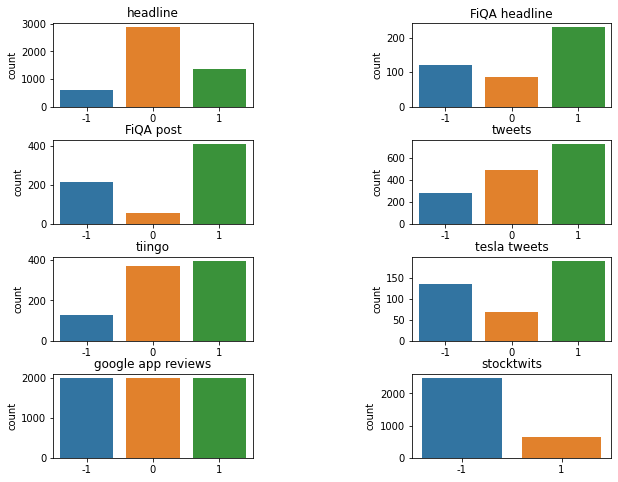

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.4, wspace=0.8)
ax = fig.add_subplot(4, 2, 1)
p1 = sns.countplot(df1.senti)
p1.set(xlabel=None)
plt.title('headline')

ax = fig.add_subplot(4, 2, 2)
p1 = sns.countplot(df2.senti)
p1.set(xlabel=None)
plt.title('FiQA headline')

ax = fig.add_subplot(4, 2, 3)
p1 = sns.countplot(df3.senti)
p1.set(xlabel=None)
plt.title('FiQA post')

ax = fig.add_subplot(4, 2, 4)
p1 = sns.countplot(df4.senti)
p1.set(xlabel=None)
plt.title('tweets')

ax = fig.add_subplot(4, 2, 5)
p1 = sns.countplot(df5.senti)
p1.set(xlabel=None)
plt.title('tiingo')

ax = fig.add_subplot(4, 2, 6)
p1 = sns.countplot(df6.senti)
p1.set(xlabel=None)
plt.title('tesla tweets')

ax = fig.add_subplot(4, 2, 7)
p1 = sns.countplot(df7.senti)
p1.set(xlabel=None)
plt.title('google app reviews')

ax = fig.add_subplot(4, 2, 8)
p1 = sns.countplot(df8.senti)
p1.set(xlabel=None)
plt.title('stocktwits')

plt.show()


In [182]:
# Combine the three datasets
vert_stack = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=0)

# Shuffle the rows which are ordered according to the source of data.
vert_stack = vert_stack.sample(frac=1,random_state=333)

vert_stack.reset_index(drop=True,inplace=True)

In [183]:
print(vert_stack.shape,'\n')

nrows = vert_stack.shape[0]

assert nrows==ntot,"Stacked dataset size is different from combined size of individual datasets"

vert_stack.head()

(17844, 2) 



,text,senti
0,$3.98 Billion in Sales Expected for Jacobs Eng...,1
1,"Operating result , excluding one-off items , t...",-1
2,"great app, better than Google's free one. but ...",0
3,said trump polit dive market spi nk,-1
4,qqq spi iwm spx rut,-1


In [184]:
print(vert_stack['senti'].nunique())

print('')

print(vert_stack['senti'].unique())

print('')

print(vert_stack['senti'].value_counts())

3

[ 1 -1  0]

-1    5948
 1    5948
 0    5948
Name: senti, dtype: int64


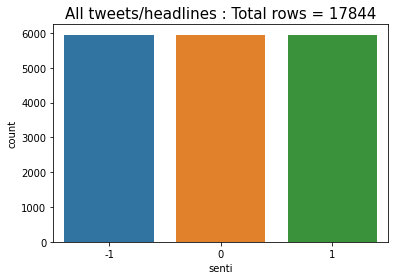

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(1)
sns.countplot(vert_stack.senti)
plt.title('All tweets/headlines : Total rows = '+str(nrows),fontsize=15)
plt.savefig('figs/all_17844_sentiment.png', bbox_inches = 'tight')

plt.show()

In [186]:
fname = '../../datasets/tiingo_tweets/all_tweets_headlines_17844.csv'  

vert_stack.to_csv(fname,index=False)

print('\nDone writing')


Done writing
